# Physicochemical Properties of Protein Tertiary Structure

Variable Information:

RMSD-Size of the residue. 

F1 - Total surface area.

F2 - Non polar exposed area.

F3 - Fractional area of exposed non polar residue. 

F4 - Fractional area of exposed non polar part of residue.

F5 - Molecular mass weighted exposed area.

F6 - Average deviation from standard exposed area of residue.

F7 - Euclidian distance.

F8 - Secondary structure penalty.

F9 - Spacial Distribution constraints (N,K Value).

In [23]:

import pandas as pd
df=pd.read_csv('CASP.csv')
df.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [24]:
df.shape

(45730, 10)

# DATA PRE-PROCESSING

In [25]:
from sklearn.preprocessing import StandardScaler

# 1. Handling Missing Values
print(df.isnull().sum())

# As there are no missing values, we don't need to handle them in this case.

# 2. Feature Scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

# 3. Feature Encoding
# There are no categorical variables in this dataset, so no encoding is needed.

print(scaled_df.head())


RMSD    0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
dtype: int64
       RMSD        F1        F2        F3        F4        F5        F6  \
0  1.558531  0.908481  0.879584  0.240885  1.058750  0.894440  0.996035   
1 -0.282357 -0.906740 -0.952127 -0.640245 -0.903989 -1.001457 -0.834813   
2  0.249495 -0.528725 -0.881704 -1.255652 -0.653210 -0.518857 -0.912117   
3  1.324313 -0.356576 -0.443293 -0.338425 -0.643398 -0.279821 -0.517141   
4  0.034891 -0.594061 -0.874424 -1.106651 -0.921619 -0.615710 -0.730225   

         F7        F8        F9  
0  0.149539  0.566885 -1.253153  
1 -0.331492 -0.548301  0.672800  
2 -0.505989 -0.725315  0.717134  
3 -0.371967  0.000441  0.759477  
4 -0.589569 -0.512898  0.901558  


# Applying 3 regression models
1)Linear Regression
2)Decision Trees
3)Random Forest


# Splitting Training & Testing data

In [26]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop('RMSD', axis=1) 
y = df['RMSD']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 1) IMPLEMENTING Linear Regression model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse_lr)

r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression R2 Score:", r2_lr)

Linear Regression Mean Squared Error: 27.09623955581746
Linear Regression R2 Score: 0.27719503929221023


In [28]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0) 

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

# Evaluating the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)

r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression R2 Score:", r2_ridge)


Ridge Regression Mean Squared Error: 27.095500752960127
Ridge Regression R2 Score: 0.2772147472066301


# 2) IMPLEMENTING Decision Tree Regression model

In [29]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluating the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Mean Squared Error:", mse_dt)

r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree R2 Score:", r2_dt)


Decision Tree Mean Squared Error: 26.331490504774404
Decision Tree R2 Score: 0.29759508065779594


# Applying HYPERPARAMETER TUNING

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing Grid Search CV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = -grid_search_dt.best_score_

print("Best Parameters (Decision Tree):", best_params_dt)
print("Best Negative MSE (Decision Tree):", best_score_dt)

# Using the best model obtained from Grid Search
best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluating the model
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
print("Best Decision Tree Mean Squared Error:", mse_best_dt)

r2_best_dt = r2_score(y_test, y_pred_best_dt)
print("Decision Tree R2 Score:", r2_best_dt)



Best Parameters (Decision Tree): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Negative MSE (Decision Tree): 21.827777845460922
Best Decision Tree Mean Squared Error: 21.117528674586843
Decision Tree R2 Score: 0.43667996983724344


# 3) IMPLEMENTING Random Forest Regression model

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=15, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R2 Score:", r2_rf)

Random Forest Mean Squared Error: 13.566961438123071
Random Forest R2 Score: 0.6380949094797445


# Applying HYPERPARAMETER TUNING

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Define the grid of hyperparameters
param_grid_rf = {
    'n_estimators': [5, 10],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}

# Performing Grid Search CV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = -grid_search_rf.best_score_  # Negate the score to obtain actual MSE

print("Best Parameters (Random Forest):", best_params_rf)
print("Best Negative MSE (Random Forest):", best_score_rf)

# Using the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluating the model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
print("Best Random Forest Mean Squared Error:", mse_best_rf)

r2_best_rf = r2_score(y_test, y_pred_best_rf)
print("Random Forest R2 Score:", r2_best_rf)

Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best Negative MSE (Random Forest): 14.858387617073637
Best Random Forest Mean Squared Error: 14.122158895508877
Random Forest R2 Score: 0.623284755637395


In [33]:
# All the scores

print("Linear Regression (Default) MSE:", mse_lr)
print("Linear Regression (Default) R2 Score:", r2_lr)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R2 Score:", r2_ridge)

print("Decision Trees (Default) MSE:", mse_dt)
print("Decision Trees (Default) R2 Score:", r2_dt)

print("Decision Trees (Best) MSE:", mse_best_dt)
print("Decision Trees (Best) R2 Score:", r2_best_dt)

print("Random Forest (Default) MSE:", mse_rf)
print("Random Forest (Default) R2 Score:", r2_rf)

print("Random Forest (Best) MSE:", mse_best_rf)
print("Random Forest (Best) R2 Score:", r2_best_rf)


Linear Regression (Default) MSE: 27.09623955581746
Linear Regression (Default) R2 Score: 0.27719503929221023
Ridge Regression MSE: 27.095500752960127
Ridge Regression R2 Score: 0.2772147472066301
Decision Trees (Default) MSE: 26.331490504774404
Decision Trees (Default) R2 Score: 0.29759508065779594
Decision Trees (Best) MSE: 21.117528674586843
Decision Trees (Best) R2 Score: 0.43667996983724344
Random Forest (Default) MSE: 13.566961438123071
Random Forest (Default) R2 Score: 0.6380949094797445
Random Forest (Best) MSE: 14.122158895508877
Random Forest (Best) R2 Score: 0.623284755637395


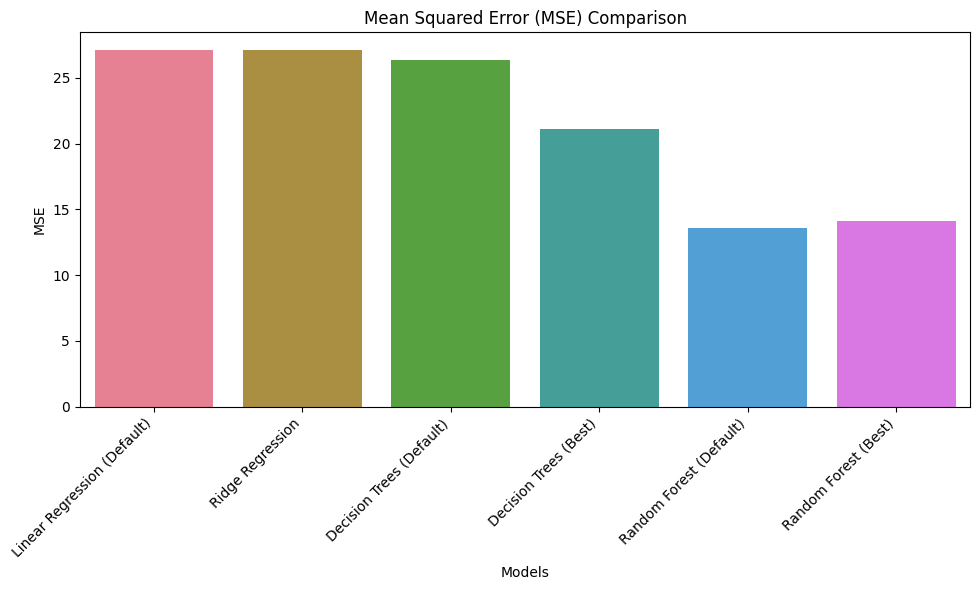

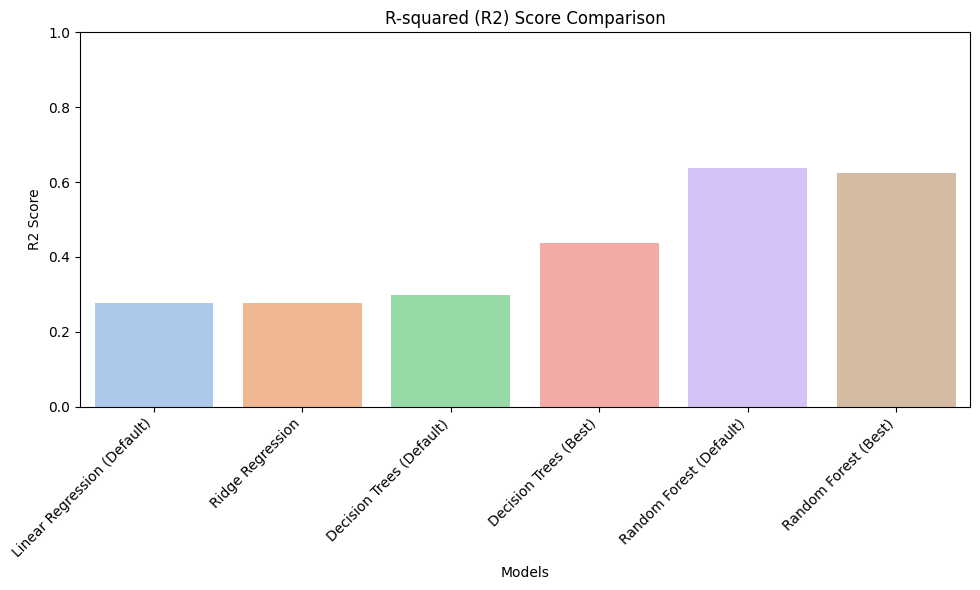

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Linear Regression (Default)', 'Ridge Regression', 'Decision Trees (Default)', 
          'Decision Trees (Best)', 'Random Forest (Default)', 'Random Forest (Best)']

mse_values = [mse_lr, mse_ridge, mse_dt, mse_best_dt, mse_rf, mse_best_rf]
r2_values = [r2_lr, r2_ridge, r2_dt, r2_best_dt, r2_rf, r2_best_rf]

# Creating a bar plot for MSE values
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_values, hue=models, palette='husl', dodge=False, legend=False)
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Creating a bar plot for R2 score values
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_values, hue=models, palette='pastel', dodge=False, legend=False)
plt.title('R-squared (R2) Score Comparison')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


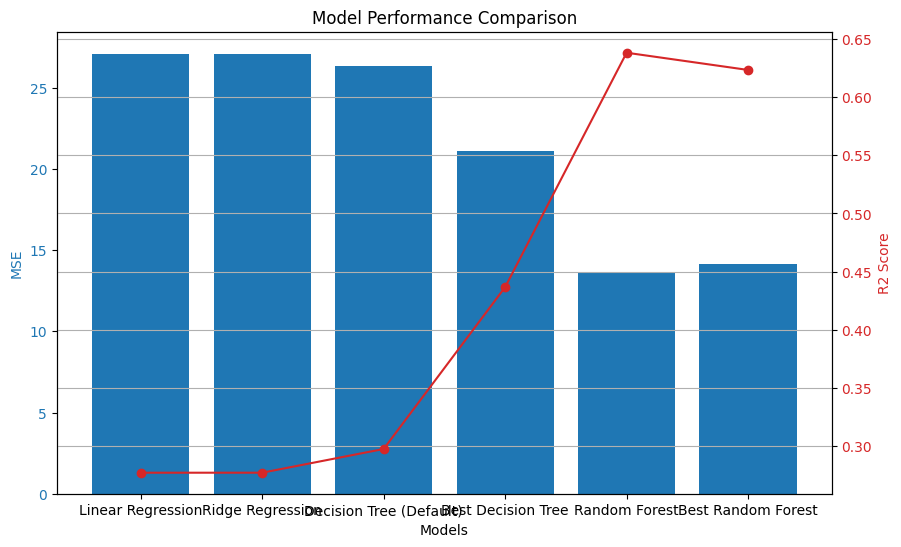

In [35]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Ridge Regression' , 'Decision Tree (Default)', 'Best Decision Tree', 'Random Forest', 'Best Random Forest']


mse_values = [mse_lr,mse_ridge, mse_dt, mse_best_dt, mse_rf, mse_best_rf]
r2_values = [r2_lr,r2_ridge, r2_dt, r2_best_dt, r2_rf, r2_best_rf]

# Setting up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting MSE values
color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color=color)
ax1.bar(models, mse_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plotting R2 score values
color = 'tab:red'
ax2.set_ylabel('R2 Score', color=color)
ax2.plot(models, r2_values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Model Performance Comparison')
plt.grid(True)
plt.show()
